In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer

In [2]:
def kf_RandomFroestRegressor(X, y, n_estimators =100 ,k=5):
    # Set up k-fold parameters
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    #Store the results of each validation
    train_r_squared = []
    test_r_squared = []
    train_mse = []
    test_mse = []
    
    # Creat a new array to store the error of each data point later.
    n_outputs = y.shape[1]
    train_errors = np.empty((0, n_outputs), dtype=float)
    test_error = np.empty((0, n_outputs), dtype=float)

    # Iterate through the cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # set up the RF model
        model = RandomForestRegressor(n_estimators = n_estimators, n_jobs=-1).fit(X_train, y_train)
        
        # Predict and calculate performance and errors
        train_pred = model.predict(X_train)
        train_e = y_train - train_pred
        train_errors = np.concatenate((train_errors,train_e), axis = 0 )
        
        train_r_squared.append(r2_score(y_train, train_pred))
        train_mse.append(mean_squared_error(y_train, train_pred))
        
        
        test_pred = model.predict(X_test)
        test_e = y_test - test_pred
        test_error = np.concatenate((test_error,test_e), axis = 0 )
        
        test_r_squared.append(model.score(X_test, y_test))
        test_mse.append(mean_squared_error(y_test, test_pred))
        
    print(f"Train: R-squared = {np.mean(train_r_squared)}, MSE = {np.mean(train_mse)}\nTest: R-squared = {np.mean(test_r_squared)}, MSE = {np.mean(test_mse)}")
    return (train_errors, test_error)


In [3]:
#pd.read_csv('cleaned_extracted_data.csv')
pd.read_csv('Removed_outliers_byGroup_data.csv')

,SHLT,BMI,MSTOT,COGTOT,INHPFN,HHHRES,HCHILD,LIVSIB,HINPOV,HAIRA,HATOTB,IEARN,HITOT,PENINC,HIGOV,PRPCNT,SLFEMP,RETMON
0,5.0,33.0,14.0,17.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,20000.0,22400.0,0.0,0.0,0.0,0.0,0
1,4.0,23.8,8.0,14.0,0.0,2.0,6.0,2.0,0.0,0.0,15000.0,25000.0,107000.0,0.0,0.0,1.0,0.0,0
2,3.0,26.0,15.0,27.0,0.0,2.0,2.0,1.0,0.0,40000.0,290000.0,103000.0,134384.0,0.0,0.0,1.0,0.0,0
3,4.0,40.7,11.0,16.0,0.0,3.0,4.0,7.0,0.0,0.0,16477.0,62000.0,72157.0,0.0,0.0,0.0,0.0,0
4,3.0,22.8,15.0,31.0,0.0,4.0,4.0,4.0,0.0,4000.0,138300.0,15000.0,95660.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,4.0,39.6,14.0,23.0,0.0,2.0,5.0,6.0,1.0,0.0,27500.0,27000.0,29112.0,0.0,0.0,0.0,0.0,0
33534,1.0,18.4,14.0,27.0,0.0,5.0,6.0,5.0,1.0,0.0,90000.0,0.0,0.0,0.0,0.0,1.0,0.0,0
33535,1.0,26.9,9.0,25.0,0.0,2.0,7.0,7.0,1.0,0.0,2341.0,3295.0,3295.0,0.0,0.0,1.0,0.0,0
33536,4.0,29.3,13.0,23.0,0.0,3.0,3.0,7.0,1.0,0.0,0.0,18000.0,18000.0,0.0,0.0,0.0,0.0,0


Train: R-squared = 0.956397273100297, MSE = 0.276383707069042
Test: R-squared = 0.6957393817033062, MSE = 1.9318680282457514


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


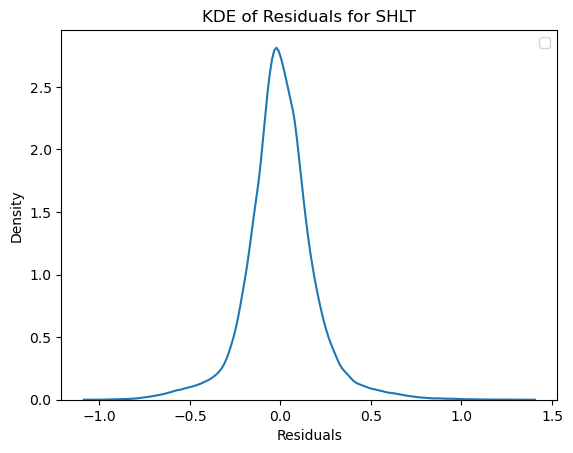

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


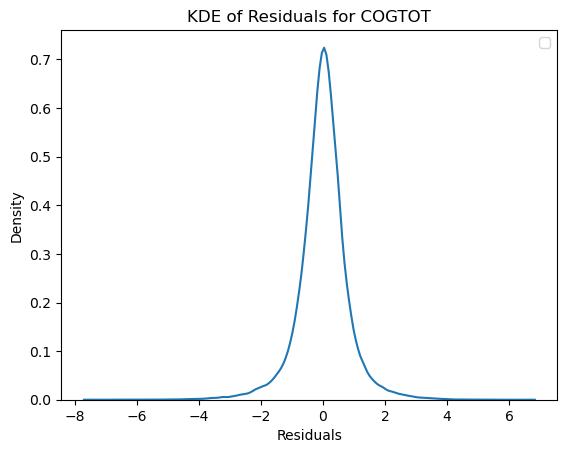

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


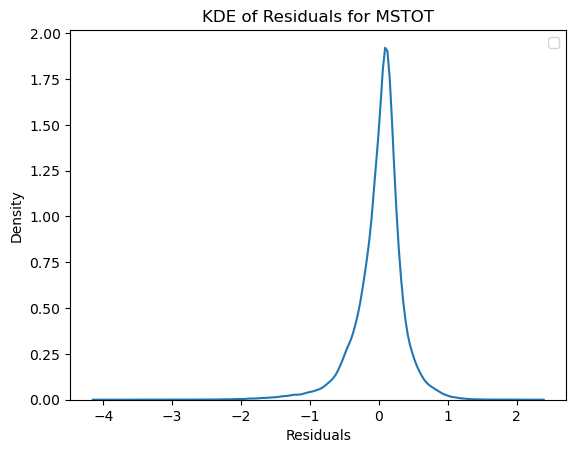

In [4]:
# df = pd.read_csv('cleaned_extracted_data.csv').drop(["HINPOVA","INHPE"], axis = 1)

df = pd.read_csv('Removed_outliers_byGroup_data.csv')

X = df.drop(['SHLT', 'COGTOT', 'MSTOT'], axis=1).values
y = df[['SHLT', 'COGTOT', 'MSTOT']].values
target_columns_1 = ['SHLT', 'COGTOT', 'MSTOT']

train_e, test_e = kf_RandomFroestRegressor(X,y)
for i, col in enumerate(target_columns_1):
    sns.kdeplot(train_e[:, i])
    plt.title(f'KDE of Residuals for {col}')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Train: R-squared = 0.9564044224508395, MSE = 0.2762040603222532
Test: R-squared = 0.6950183394519631, MSE = 1.9322862700001608


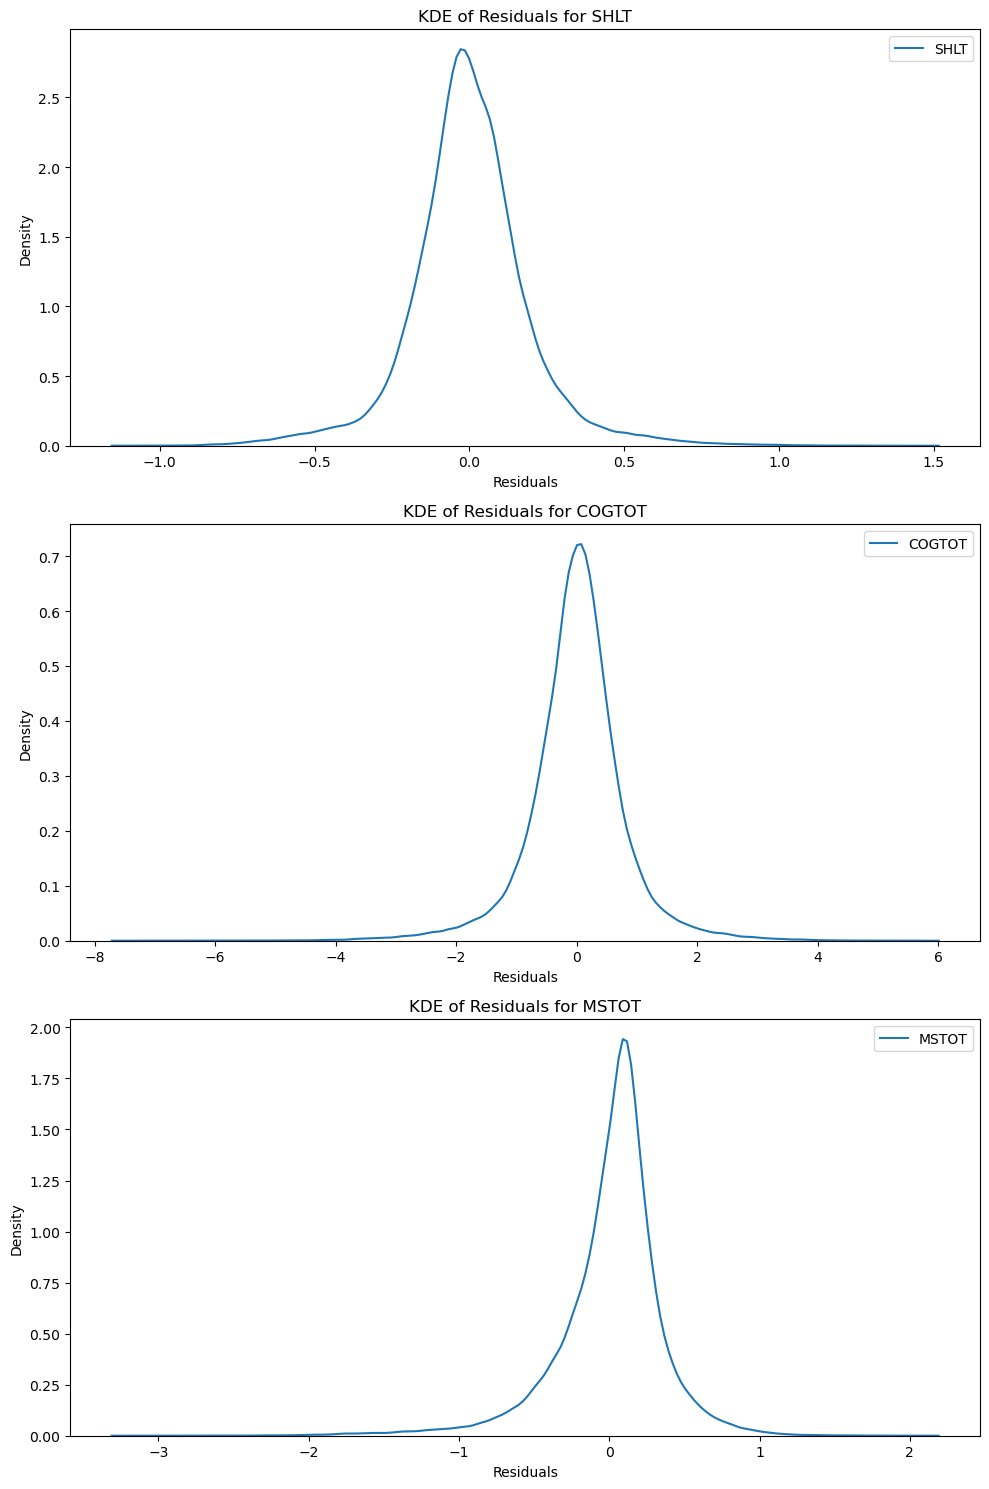

In [5]:
df = pd.read_csv('Removed_outliers_byGroup_data.csv')

X = df.drop(['SHLT', 'COGTOT', 'MSTOT'], axis=1).values
y = df[['SHLT', 'COGTOT', 'MSTOT']].values
target_columns_1 = ['SHLT', 'COGTOT', 'MSTOT']

train_e, test_e = kf_RandomFroestRegressor(X,y)
fig, axes = plt.subplots(nrows=len(target_columns_1), ncols=1, figsize=(10, 15))

for i, col in enumerate(target_columns_1):
    ax = axes[i]
    sns.kdeplot(train_e[:, i], label=f'{col}', ax=ax)
    ax.set_title(f'KDE of Residuals for {col}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

Run a random forest on raw data

In [6]:

# #Separate the input features and target values
# X = df.drop(['SHLT', 'COGTOT', 'MSTOT','BMI'], axis=1)  # Input features
# y = df[['SHLT', 'COGTOT', 'MSTOT']]  # Target variables
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize a dictionary to store the models and their metrics
# models_metrics = {}

# # Train separate models for each target variable
# for target in y.columns:
#     # Train the model
#     model = RandomForestRegressor(n_estimators = 200, n_jobs=-1)
#     model.fit(X_train, y_train[target])
    
#     # Predict on the testing set
#     y_pred = model.predict(X_test)
    
#     # Evaluate the model
#     r2 = r2_score(y_test[target], y_pred)
#     mse = mean_squared_error(y_test[target], y_pred)
    
#     # Store the model and its metrics
#     models_metrics[target] = {'R2 Score': r2, 'MSE': mse}

# # Display the models' metrics
# for target, metrics in models_metrics.items():
#     print(f"Model for {target}: R2 Score = {metrics['R2 Score']}, MSE = {metrics['MSE']}")

In [7]:
continuous_features = ['BMI', 'INHPFN',  'HHHRES', 'HCHILD','LIVSIB',  'HAIRA', 'HATOTB', 'IEARN','HITOT', 'PRPCNT']
cate_features = ['HINPOV','PENINC', 'HIGOV', 'RETMON', 'SLFEMP']

Run the data on normalized and encoded data or data with polynomial feature

In [8]:
# transfer data
trans = make_column_transformer((StandardScaler(), continuous_features),
                                remainder="passthrough")

df2 = pd.DataFrame( trans.fit_transform( df ) , columns=trans.get_feature_names_out( ) )
df2.columns
target_columns = ['remainder__SHLT', 'remainder__MSTOT','remainder__COGTOT']

Train: R-squared = 0.956248570521708, MSE = 0.27669556151426244
Test: R-squared = 0.6944756930931292, MSE = 1.9314545712784696


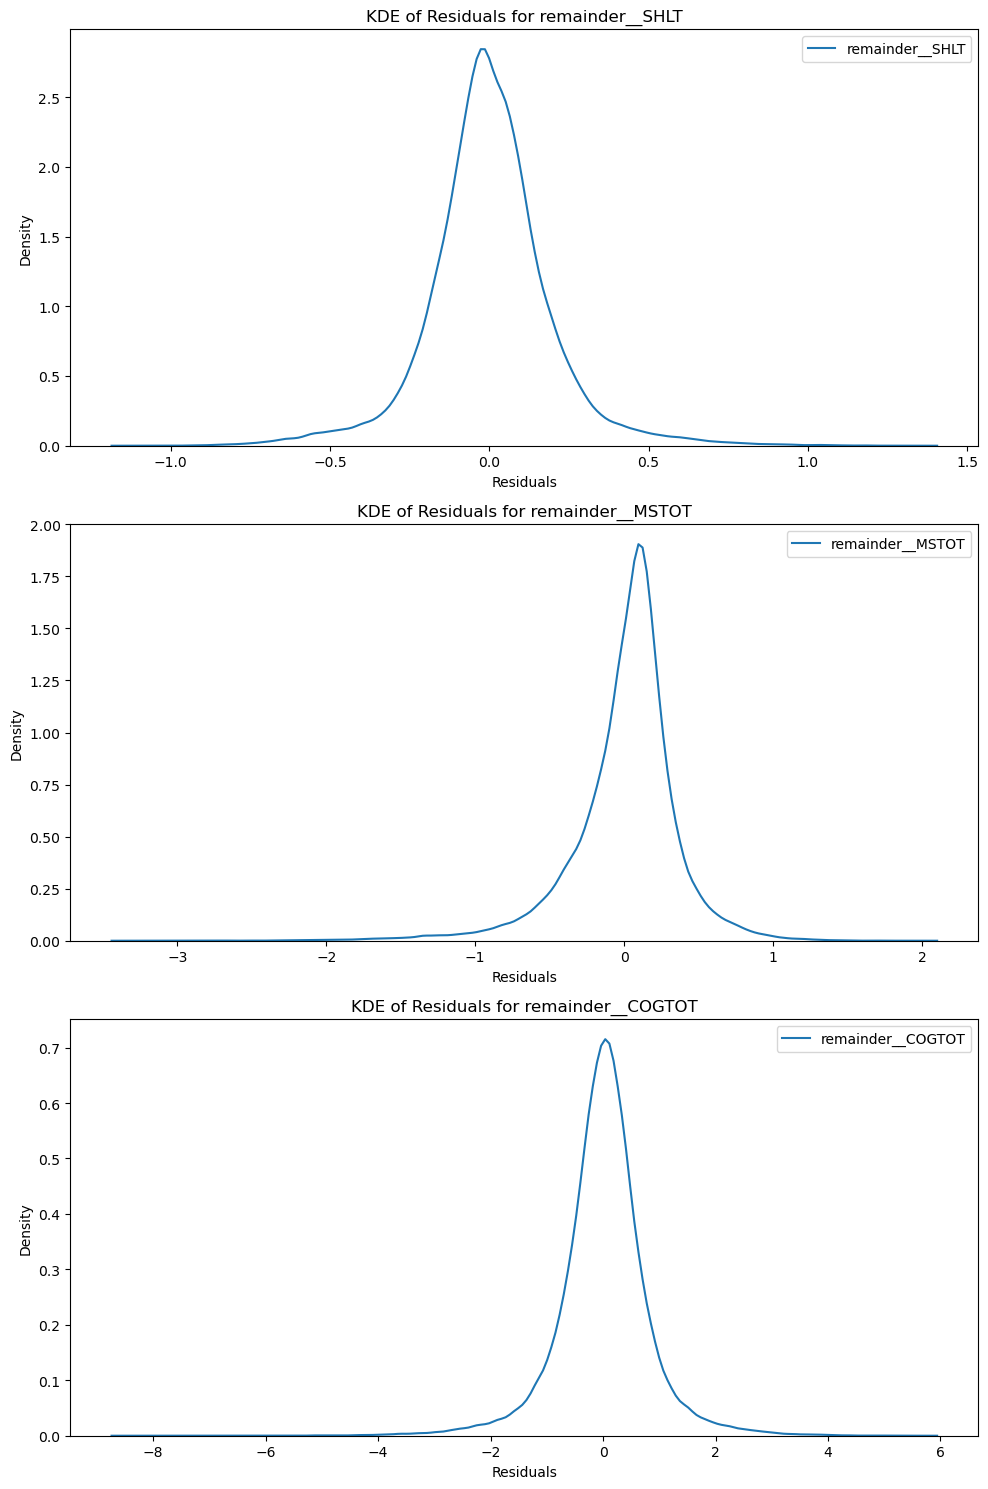

In [9]:
X = df2.drop(target_columns, axis=1).values
y = df2[target_columns].values

train_e, test_e = kf_RandomFroestRegressor(X,y)

fig, axes = plt.subplots(nrows=len(target_columns), ncols=1, figsize=(10, 15))

for i, col in enumerate(target_columns):
    ax = axes[i]
    sns.kdeplot(train_e[:, i], label=f'{col}', ax=ax)
    ax.set_title(f'KDE of Residuals for {col}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

In [10]:
# target_columns = ['remainder__SHLT', 'remainder__MSTOT','remainder__COGTOT']
# X = df2.drop(target_columns, axis=1)  # Input features
# y = df2[target_columns]  # Target variables
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# for target in target_columns:
#     model = RandomForestRegressor(n_estimators = 150, n_jobs=-1)
#     model.fit(X_train, y_train[target])

#         # Predict on the testing set
#     y_pred = model.predict(X_test)

#         # Evaluate the model
#     r2 = r2_score(y_test[target], y_pred)
#     mse = mean_squared_error(y_test[target], y_pred)

#         # Store the model and its metrics
#     print(f"R2 Score: {r2} MSE: {mse}")